# Problem-Statement
Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.

We have a data of 74111 Airbnb properties across the nations. Based on this data build multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.

# Attribute Information

id - Property ID

room_type - Type of Room in the property.

accommodates - How many adults can this property accomodates.

bathrooms - Number of bathrooms in the property.

cancellation_policy - Cancellation policy of the property.

cleaning_fee - This denotes whether propoerty cleaning fee is included in the rent or not.

instant_bookable - It indicates whether instant booking facility is available or not.

review_scores_rating - Review rating score of the property.

bedrooms - Number of bedrooms in the property.

beds - Total number of beds in the property.

log_price - Log of rental price of the property for a fixed period.

# Import necessary libraries and read the dataset.


In [1]:
# Numerical libraries
import math
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
df=pd.read_csv(r"C:\Users\FCI\Downloads\AirBNB-1.csv")

C:\Users\FCI\AppData\Local\Temp\ipykernel_12196\1823034662.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\FCI\Downloads\AirBNB-1.csv")


*Check the first few samples, shape, info of the data and try 
to familiarize yourself with different features

In [3]:
#checked top few records to get a feel of the dataset
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [6]:
df.shape
#This dataset have 74111 rows and 11 columns

(74111, 11)

In [7]:
df.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [8]:
df.dtypes

id                        int64
room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee             object
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object

The dataset have 7 numerical columns and 4 categorical columns

Dropping id column from the dataset

In [9]:
df=df.drop(['id'],axis=1)

summary statistics

In [10]:

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.155125,2.153603,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.235272,0.582054,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.067365,7.836556,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.265797,0.852149,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.710868,1.254142,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.782069,0.717394,0.0,4.317488,4.70953,5.220356,7.600402


Insights

* Most of the properties are entire home/apartment type
* 75% of the accommodates data have 4 persons per group
* The average number of bathrooms, bedrooms and beds is 1
* Most of the properties have strict cancellation policy
* Cleaning fee is included in most of the properties
* Instant bookable option is not avilable for most of the properties
* The average review score rating is 94%
* The average log price is 4.78 and it goes upto 7.6

*Check if there are any duplicate records in the dataset? if any drop them.

In [11]:
dupes=df.duplicated()
sum(dupes)

19994

In [12]:
df=df.drop_duplicates()

Checking for any special characters present in the data

In [13]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

In [14]:
cat_col = df.select_dtypes(include=['category'])

for col in cat_col:
    print('Unique Values of {} are \n'.format(col),df[col].unique())
    print('*'*90)

Unique Values of room_type are 
 ['Entire home/apt', 'Private room', 'Shared room', NaN]
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
******************************************************************************************
Unique Values of cancellation_policy are 
 ['strict', 'moderate', 'flexible', NaN]
Categories (3, object): ['flexible', 'moderate', 'strict']
******************************************************************************************
Unique Values of cleaning_fee are 
 [True, False, NaN]
Categories (2, bool): [False, True]
******************************************************************************************
Unique Values of instant_bookable are 
 ['f', 't']
Categories (2, object): ['f', 't']
******************************************************************************************


* Encode Categorical Variable

In [15]:
#one hot encoding
df=pd.get_dummies(df,prefix=['RT_','CF_','IB_'],columns=['room_type','cleaning_fee','instant_bookable'],dtype=int)

In [16]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder=LabelEncoder()

In [18]:
df['cancellation_policy']=labelencoder.fit_transform(df['cancellation_policy'])

In [19]:
df.head()

,accommodates,bathrooms,cancellation_policy,review_scores_rating,bedrooms,beds,log_price,RT__Entire home/apt,RT__Private room,RT__Shared room,CF__False,CF__True,IB__f,IB__t
0,3.0,1.0,2,100.0,1.0,1.0,5.010635,1,0,0,0,1,1,0
1,7.0,1.0,2,93.0,3.0,3.0,5.129899,1,0,0,0,1,0,1
2,5.0,1.0,1,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,1
3,4.0,1.0,0,NaN,2.0,2.0,6.620073,1,0,0,0,1,1,0
4,2.0,1.0,1,40.0,0.0,1.0,4.744932,1,0,0,0,1,0,1


Dealing with missing values

In [20]:
df.isnull().sum()

accommodates                3
bathrooms                 195
cancellation_policy         0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
RT__Entire home/apt         0
RT__Private room            0
RT__Shared room             0
CF__False                   0
CF__True                    0
IB__f                       0
IB__t                       0
dtype: int64

In [21]:
df=df.drop("review_scores_rating",axis=1)

In [22]:
df["accommodates"]=df["accommodates"].fillna(df["bathrooms"].mode()[0])

In [23]:
df["bathrooms"]=df["bathrooms"].fillna(df["bathrooms"].mode()[0])

In [24]:
df["bedrooms"]=df["bedrooms"].fillna(df["bedrooms"].mode()[0])

In [25]:
df["beds"]=df["beds"].fillna(df["beds"].mode()[0])

In [26]:
df.isnull().sum()

accommodates           0
bathrooms              0
cancellation_policy    0
bedrooms               0
beds                   0
log_price              0
RT__Entire home/apt    0
RT__Private room       0
RT__Shared room        0
CF__False              0
CF__True               0
IB__f                  0
IB__t                  0
dtype: int64

Check for the presence of outliers and treat them with appropriate techniques.

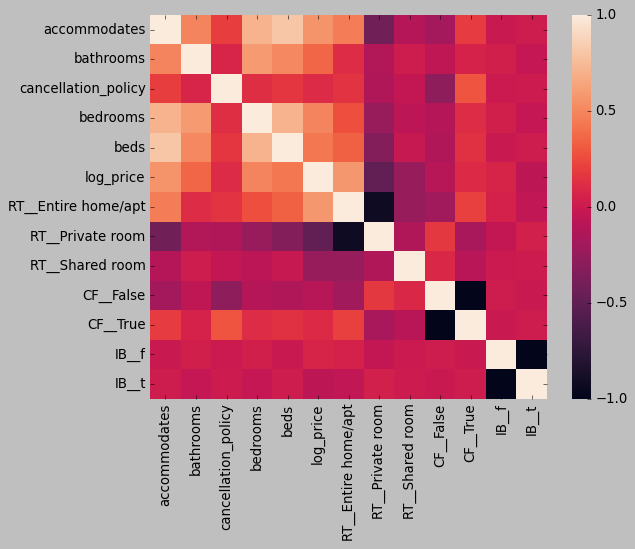

In [27]:
#heatmap
sns.heatmap(df.corr(numeric_only=True))
plt.show()

price is highly positively correlated with the variables accommodates,bathrooms,bedrooms 
and beds highly negatively correlated with room type for private,entire home/apartment and shared room

In [28]:
df.columns

Index(['accommodates', 'bathrooms', 'cancellation_policy', 'bedrooms', 'beds',
       'log_price', 'RT__Entire home/apt', 'RT__Private room',
       'RT__Shared room', 'CF__False', 'CF__True', 'IB__f', 'IB__t'],
      dtype='object')

C:\Users\FCI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


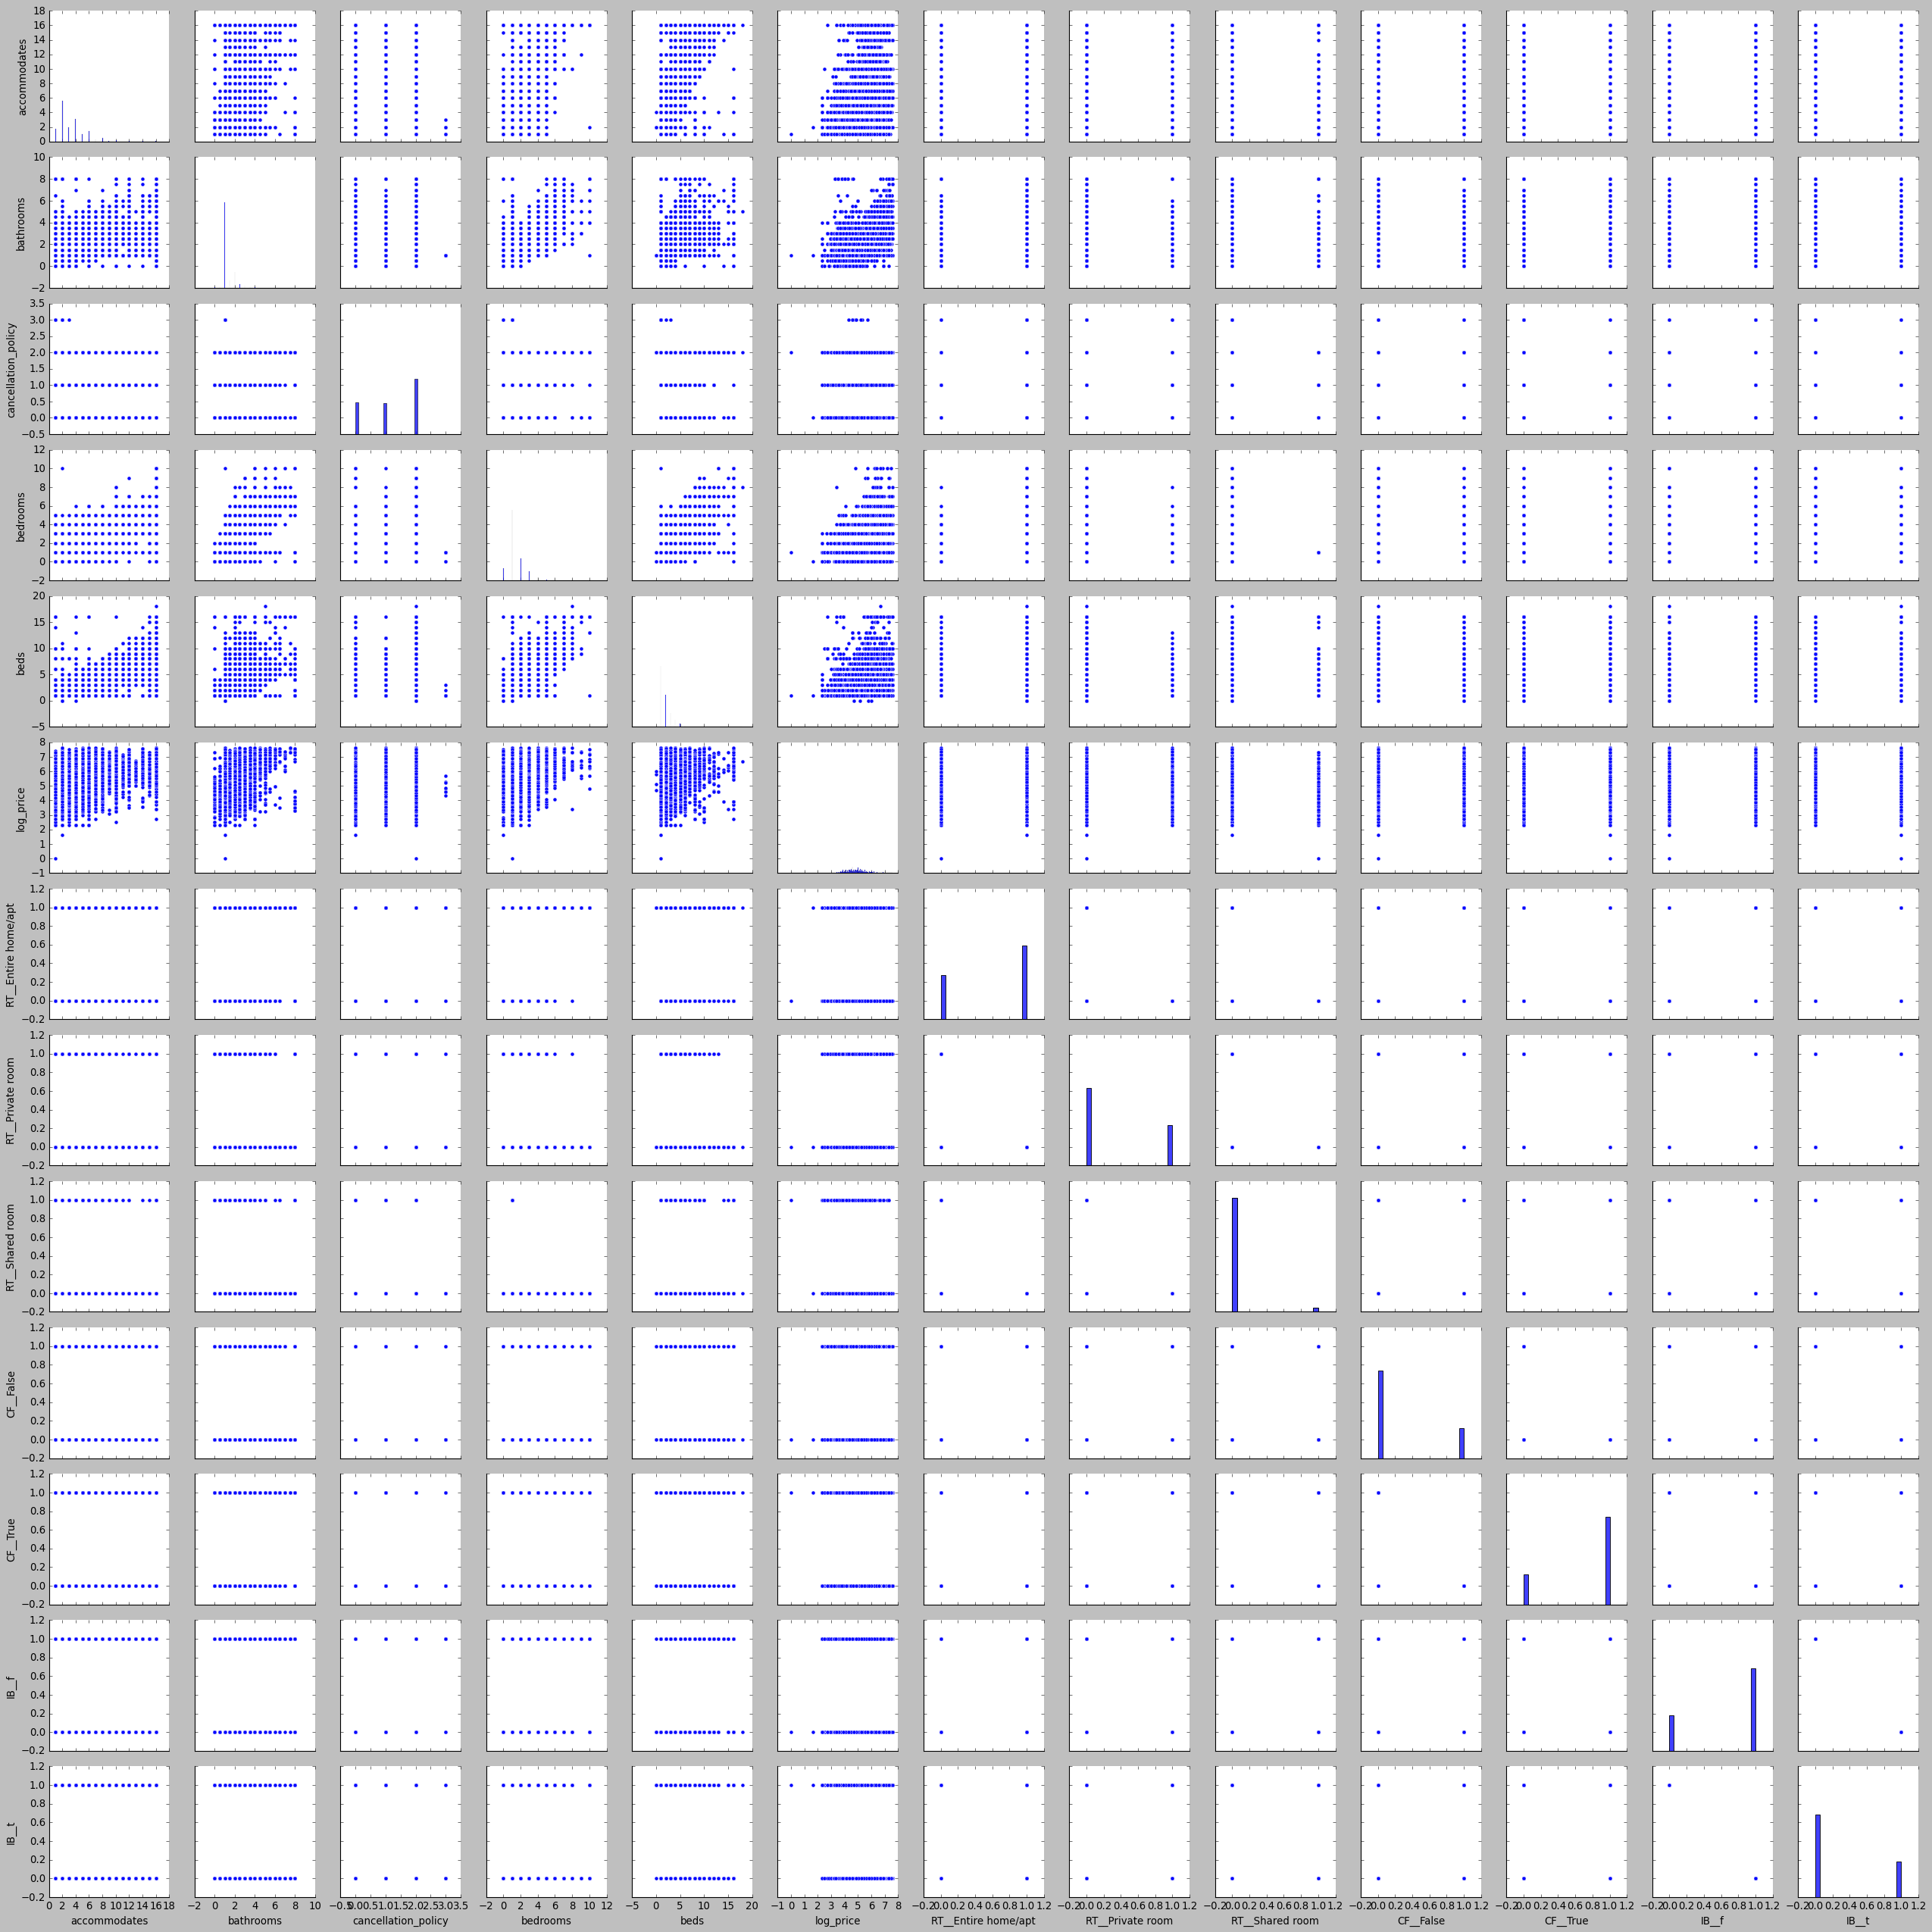

In [29]:
#pairplot
sns.pairplot(df)
plt.show()

C:\Users\FCI\AppData\Local\Temp\ipykernel_12196\842422799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_price'],kde=True)


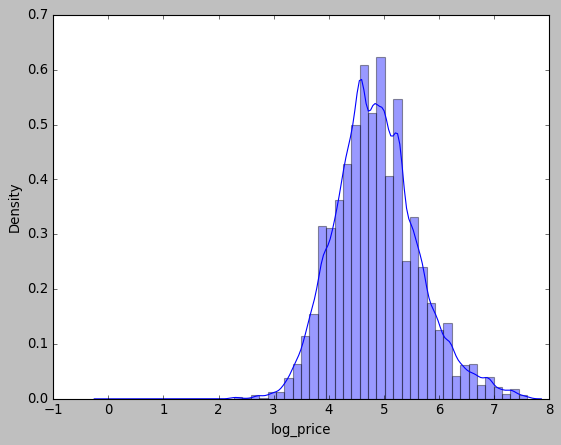

In [30]:
sns.distplot(df['log_price'],kde=True)
plt.show()

the distribution plot shows that the log_price values are leptokurtic. Presence of ouliers

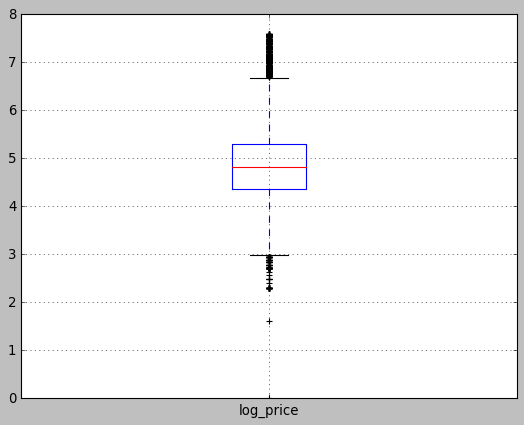

In [31]:
#boxplot
df.boxplot(column='log_price')
plt.show()

In [32]:
#log transformation
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log1p)

In [33]:
df['log_price']=log_transformer.fit_transform(df[['log_price']])

In [34]:
z=np.abs(zscore(df))
print(z)

       accommodates  bathrooms  cancellation_policy  bedrooms      beds  \
0          0.224350   0.467103             0.961923  0.381408  0.661874   
1          1.482249   0.467103             0.961923  1.722099  0.783912   
2          0.628949   0.467103             0.235960  0.381408  0.783912   
3          0.202299   0.467103             1.433843  0.670345  0.061019   
4          0.651000   0.467103             0.235960  1.433161  0.661874   
...             ...        ...                  ...       ...       ...   
74104      0.651000   0.467103             0.961923  0.381408  0.661874   
74107      0.202299   1.070782             0.235960  0.670345  1.506806   
74108      0.628949   0.467103             0.235960  0.670345  0.061019   
74109      0.651000   0.467103             0.961923  1.433161  0.061019   
74110      0.202299   0.467103             0.235960  0.381408  0.061019   

       log_price  RT__Entire home/apt  RT__Private room  RT__Shared room  \
0       0.253733       

In [35]:
#replacing outliers with median values
threshold=3
for i,j in zip(np.where(z>threshold)[0],np.where(z>threshold)[1]):
    df.iloc[1,j]=df.iloc[:,j].median()

In [36]:
threshold=-3
for i,j in zip(np.where(z<threshold)[0],np.where(z<threshold)[1]):
    df.iloc[1,j]=df.iloc[:,j].median()

Standardize the data, so that the values are within a particular range

In [37]:

from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [38]:
df[df.columns]=std_scaler.fit_transform(df[df.columns])

In [39]:
#dropping the columns that have p values greater than 0.05
df=df.drop(df[['cancellation_policy','RT__Private room','CF__False', 'CF__True']],axis=1)

Segregate the target and independent features

In [40]:
#drop independent features into x dataframe
x=df.drop('log_price',axis=1)

In [41]:
#copy the target variable column alone into y dataframe
y=df[['log_price']]

Split the dataset into train and test

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
x_train_s=x_train.apply(zscore)
x_test_s=x_test.apply(zscore)
y_train_s=y_train.apply(zscore)
y_test_s=y_test.apply(zscore)

In [44]:
regression_model=LinearRegression()

In [45]:
regression_model.fit(x_train_s,y_train_s)

LinearRegression()

In [46]:
intercept=regression_model.intercept_[0]
print(intercept)

2.620556107280959e-17


In [47]:
coef=regression_model.coef_[0]
print(coef)

[ 0.22039561  0.11362212  0.18424196 -0.09458612  0.43016072 -0.12711003
  0.01881644 -0.01881644]


In [48]:
# R square on training data
regression_model.score(x_train_s,y_train_s)

0.49583481706697763

In [49]:
# R square on testing data
regression_model.score(x_test_s,y_test_s)

0.5005167195999675

In [50]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.7103084945488305

In [51]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.7061781226497593

# Linear Regression using statsmodels(OLS)

In [52]:
import statsmodels.api as sm

In [53]:
#Add constant
x_train=sm.add_constant(x_train)# This adds the constant term beta0 to the Simple Linear Regression.
x_test=sm.add_constant(x_test)

In [54]:
#OLS Model fit
model = sm.OLS(y_train,x_train).fit()
model

In [56]:
olsmod_5 = sm.OLS(y_train, x_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     5321.
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:50:34   Log-Likelihood:                -40793.
No. Observations:               37881   AIC:                         8.160e+04
Df Residuals:                   37873   BIC:                         8.167e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0017    

In [57]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * const + (0.22) * accommodates + (0.12) * bathrooms + (0.18) * bedrooms + (-0.09) * beds + (0.43) * RT__Entire home/apt + (-0.13) * RT__Shared room + (0.02) * IB__f + (-0.02) * IB__t + 

# Conclusion


The final linear regression equation is

log_price = (3.43) * Intercept + (-0.07) * instant_bookable_True + (0.1) * accommodates 
      + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds 
    + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room 
    + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict
    + (-0.08) * cleaning_fee_True
    
 
 * When accommodates increase by 1 unit log price is increases by 0.1 units
 * When number of bathrooms increases by 1 unit price increases by 0.18 units
 * When the room type is shared increases by 1 unit price decreases by 1.08 units